<a href="https://colab.research.google.com/github/UPstartDeveloper/Problem_Solving_Practice/blob/master/practice_fall_2021/The_Weather_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Weather Report

Suppose you have the following  dataset, which contains information about a year's worth of weather. Using Python (Pandas), create some quick plots to show the following: 

1.   The median temperature by month 
2.   The median wind speed by month
3.   The snowiest months (Hint: this one will require manipulating and classifying the existing data.)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/weather_2012.csv")

## Exploratory Data Analysis

Let's get a feel for the data, shall we?

In [7]:
df.columns

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')

In [8]:
df.head(40)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog


The dataset seems to have info on every hour, of every day of the year 2012. Going to assume dates are in the format `yyyy-mm-dd`.

The meanings of the different columns seem to all make sense, except not sure what `Stn Press (kPa)` is - maybe air pressure?

In [10]:
df.isnull().sum()

Date/Time             0
Temp (C)              0
Dew Point Temp (C)    0
Rel Hum (%)           0
Wind Spd (km/h)       0
Visibility (km)       0
Stn Press (kPa)       0
Weather               0
dtype: int64

Woohoo! No null values!

## Median Temperature by Month

*ASSUMPTIONS:*

Going to **assume** it's okay to use the temperature of every hour as it's own data point, rather than first try to use the average temperature per day (which might lose precision).

*APPROACH*:
1. Seperate all the temperatures by their date-time 
2. For temperatures each specific month:
  1. sort them by least to greatest
  2. find the median
  3. add the median to the dictionary, for its respective month
3. Plot the dictionary and its values

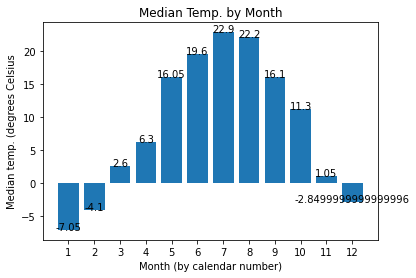

In [22]:
def plot_median_temp(df):
  """
  Plots a bar plot to show the median temp. of each month.
  Use Matplotlib and Pandas.
  """

  ### HELPERS
  def _compute_median(temps):
    '''Returns the median in a sorted, array-like object of numbers.'''
    middle_index = len(temps) // 2
    if len(temps) % 2 == 0:  # even num. of values
      return (temps[middle_index - 1] + temps[middle_index]) / 2
    return temps[middle_index]

  ### DRIVER 
  # 1. init dict of temps
  month_temps = dict(zip(
      list(range(1, 13)),  # using month numbers for now
      [0 for _ in list(range(1, 13))] # medians all start at 0
  ))
  # 2. For temperatures each specific month:
  for month in range(1, 13):
    # 1. TODO[Refactor] Separate all the temperatures by their date-time 
    if month < 10:
      temps_month = df[df["Date/Time"].str.startswith(f"2012-0{month}")]['Temp (C)']
    else:
      temps_month = df[df["Date/Time"].str.startswith(f"2012-{month}")]['Temp (C)']
    # 2. sort them by least to greatest
    temps = temps_month.sort_values().values
    # 3. find + add the median to the dictionary, for its respective month
    month_temps[month] = _compute_median(temps)
  # 3. Plot the dictionary and its values
  months = list(month_temps.keys())
  plt.bar(months, list(month_temps.values()), tick_label=months)
  plt.title("Median Temp. by Month")
  plt.xlabel("Month (by calendar number)")
  plt.ylabel("Median temp. (degrees Celsius")
  for month, temp in month_temps.items():
    plt.text(month, temp, temp, ha = 'center')
  plt.show()


plot_median_temp(df)